# ABOUT
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

# QUESTIONS


● **How should you organize your data to perform analysis on it?**

● **Has your data been properly formatted?**

● **What surprises did you discover in the data?**

● **What trends or relationships did you find in the data?**

● **How will these insights help answer your business questions?**


# USING R FOR ANALYSIS

In [1]:
library(tidyverse)
library(scales)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# IMPORTING FITBIT DATA SET 

In [2]:
daily_activity<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [3]:
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")

str(daily_activity)

'data.frame':	940 obs. of  16 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 8

In [4]:
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


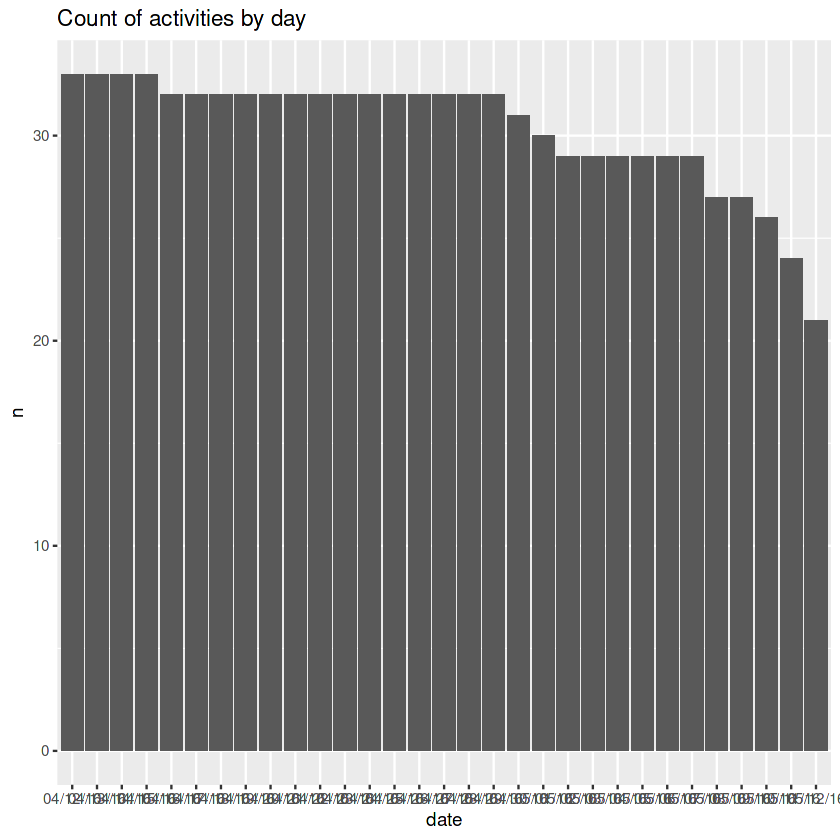

In [5]:
daily_activity %>% count(date,sort= TRUE )%>%
ggplot() + geom_col(aes(x=date,y=n))+
labs(title="Count of activities by day")


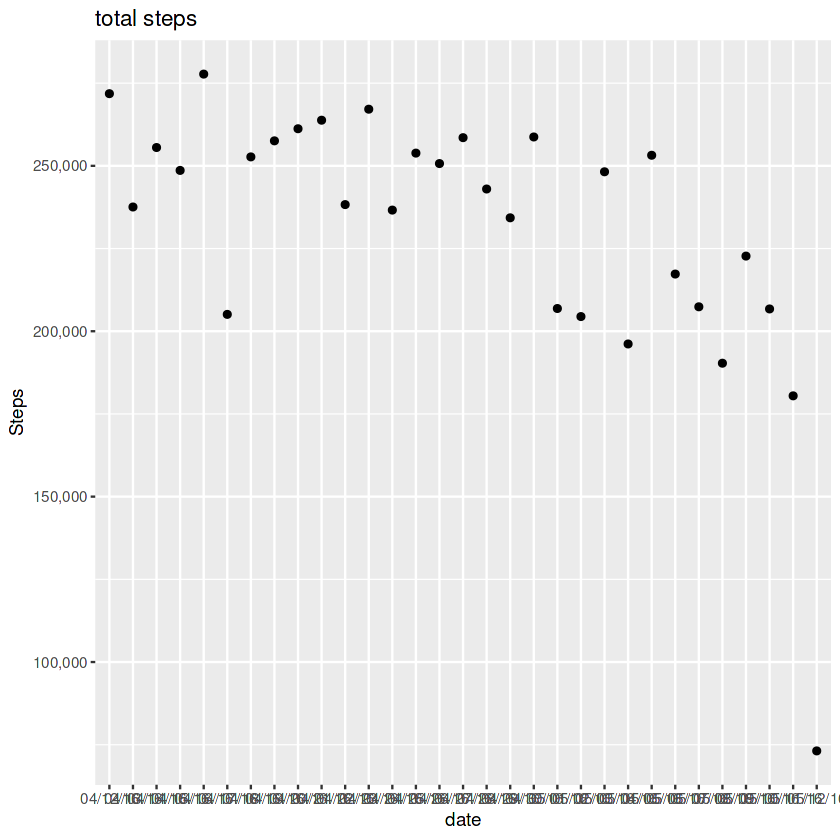

In [6]:
daily_activity %>% group_by(date) %>%
summarise(Steps =sum(TotalSteps,na.rm=TRUE))%>%
ggplot()+geom_point(aes(x=date,y=Steps))+
labs(title="total steps")+scale_y_continuous(labels=comma)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


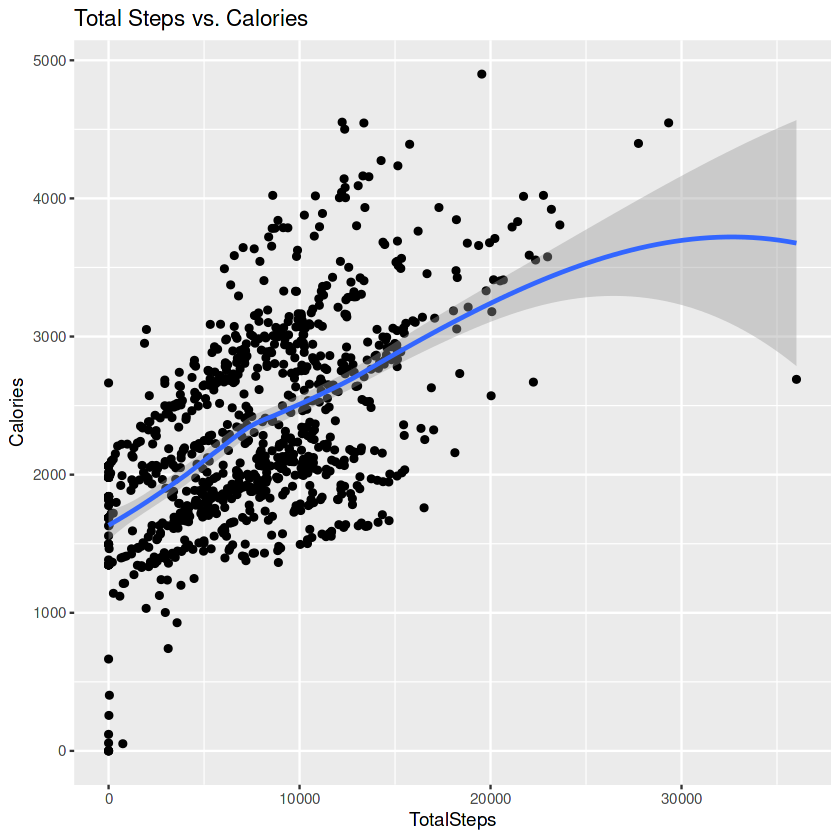

In [7]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

THIS SHOWS A POSITIVE CORRELATION BETWEEN ACTIVITY AND CALORIES BURN . IT MEANS THE MORE ACTIVE WE ARE THE MORE CALORIES WE BURN.

In [8]:
total_distance<- daily_activity %>% group_by(date) %>%
summarise(total=sum(TotalDistance,na.rm=TRUE),Mean=mean(TotalDistance,na.rm=TRUE))

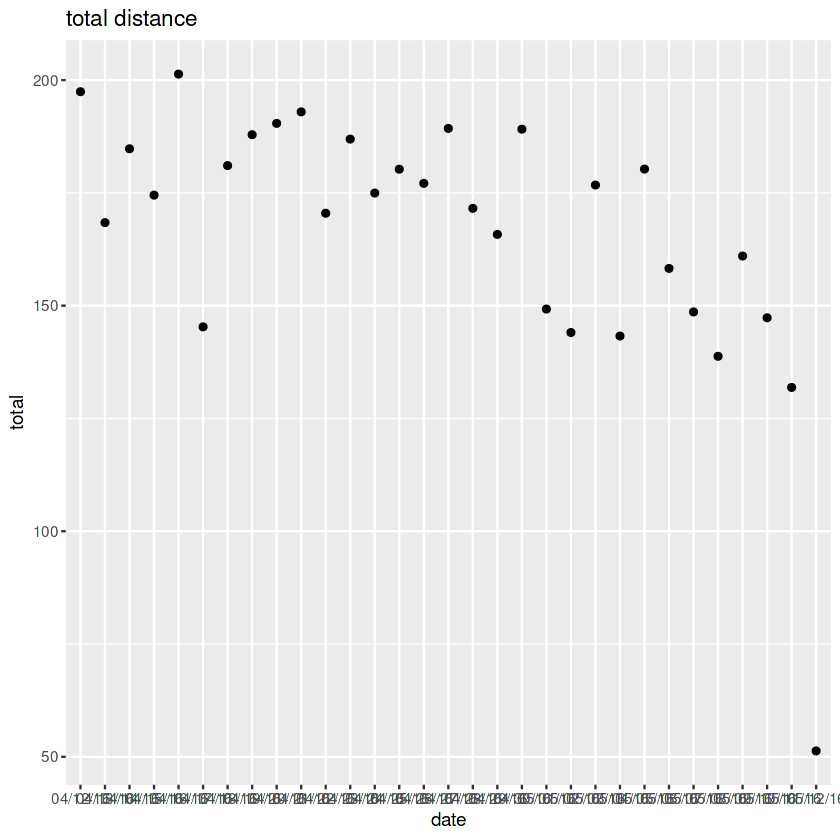

In [9]:
ggplot(total_distance)+geom_point(aes(x=date,y=total))+
labs(title="total distance",y="total")

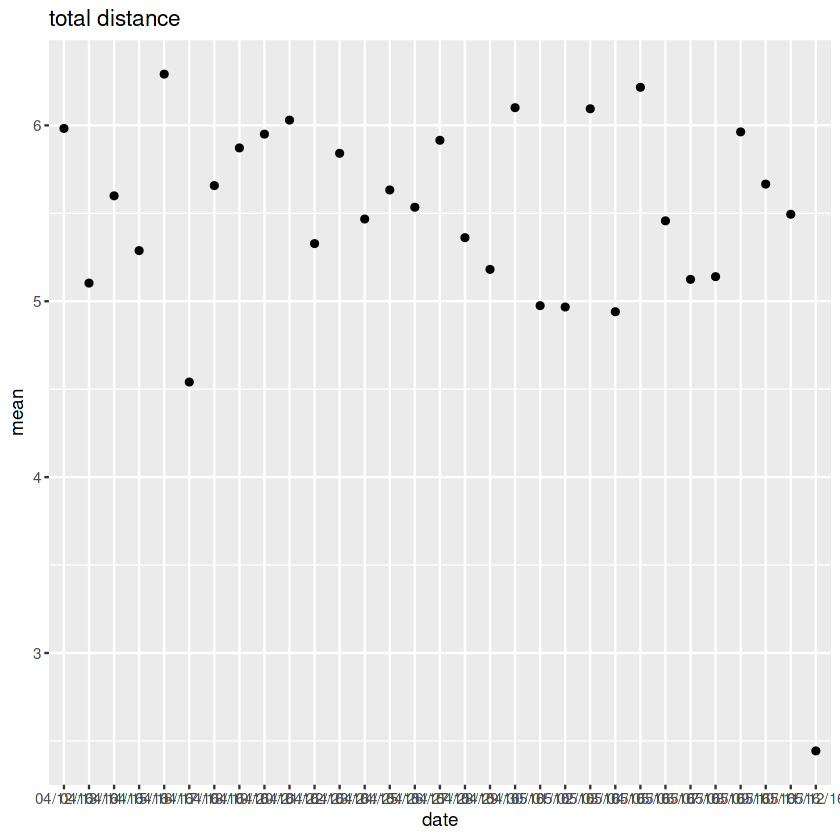

In [10]:
ggplot(total_distance)+geom_point(aes(x=date,y=Mean))+
labs(title="total distance",y="mean")

In [11]:
dailycalories<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

In [12]:
dailycalories$date <- mdy(dailycalories$ActivityDay)
str(dailycalories)

'data.frame':	940 obs. of  4 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
 $ date       : Date, format: "2016-04-12" "2016-04-13" ...


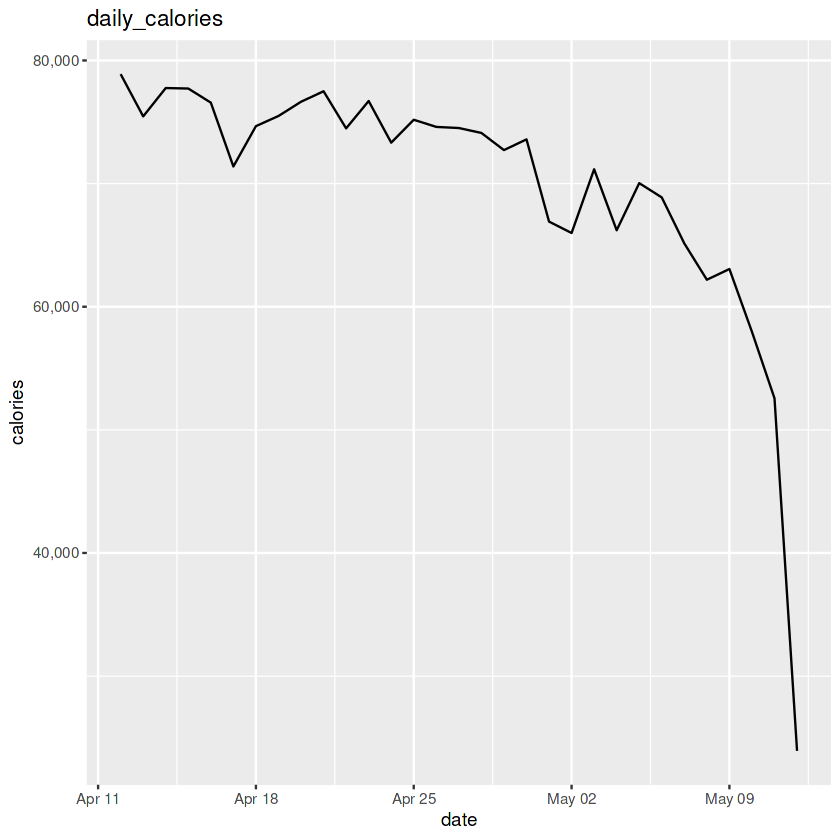

In [13]:
dailycalories %>% group_by(date) %>%
summarise(calories =sum(Calories,na.rm=TRUE))%>%
ggplot()+geom_line(aes(x=date,y=calories))+
labs(title="daily_calories")+scale_y_continuous(labels=comma)

In [14]:
hourly_intensities<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
daily_sleep<-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight<-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_calory<-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

In [15]:
head(hourly_intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


AFTER OBSERVING DATA , WE GET DATE AND TIME NEED TO BE SPLIT AND IN CORRECT FORMAT

In [16]:
hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")
# calories
hourly_calory$ActivityHour=as.POSIXct(hourly_calory$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_calory$time <- format(hourly_calory$ActivityHour, format = "%H:%M:%S")
hourly_calory$date <- format(hourly_calory$ActivityHour, format = "%m/%d/%y")
#Sleep
daily_sleep$SleepDay=as.POSIXct(daily_sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
daily_sleep$date <- format(daily_sleep$SleepDay, format = "%m/%d/%y")

In [17]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calory$Id)
n_distinct(hourly_intensities$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

IT SAYS NUMBER OF PARTICITPANT IN EACH ACTIVITY

In [18]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
daily_activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
hourly_calory %>%
  select(Calories) %>%
  summary()
# sleep
daily_sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

# SOME INTERESTING FACTS
1. AVERAGE TOTAL STEPS IS 7638 WHICH IS NOT TOO BAD . BUT IT SHOULD BE INCREASED TO REDUCE THE HEALTH RISKS .(According to research average daily steps should be 8000.)
2. AVERAGE SEDENTARY TIME SHOULD ALSO BE REDUCED.
3. SLEEP RECORD IS SAYING SHE SLEEPS ONLY ONE TIME FOR AVERAGE OF 419MINUTES.
4. LESS ACTIVE SO ACTIVITY MUST BE INPROVED.

# LETS MERGE THE DATA

In [19]:
merged_data <- merge(daily_sleep, daily_activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


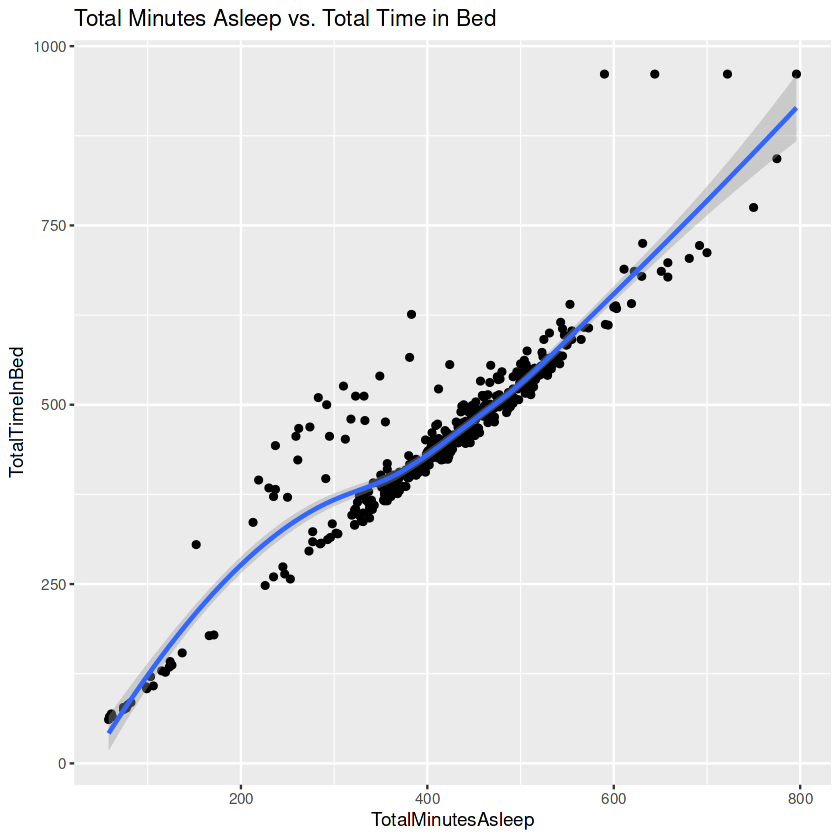

In [20]:
ggplot(data=daily_sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+geom_smooth()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

THIS LOOKS LINEAR , SO WE SHOULD REMIND THE USERS THROGH NOTIFICATION TO GO FOR SLEEP.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


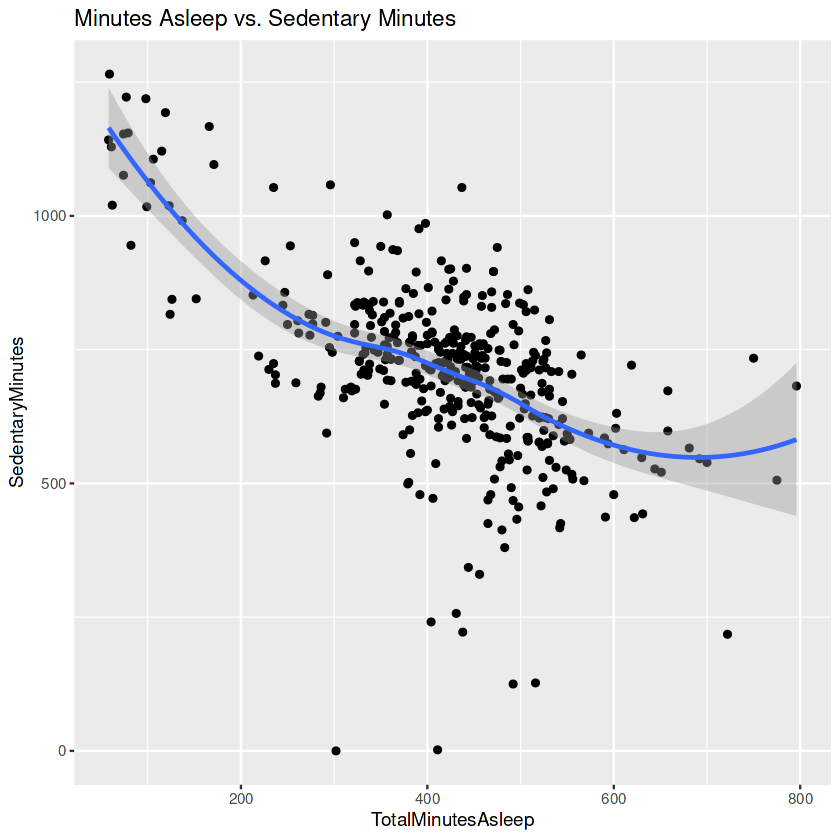

In [21]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point() + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

NEGATIVE CORRELATION: SO USERSNEED TO REDUCE SEDENTARY TIME FOR IMPROVING SLEEPING CYCLE.

# Summarizing recommendations for the business

 women who have high sedentary time should do some light activity to stay healthy (according to the activity type analysis). Even though they need to improve their everyday activity to have health benefits. They might need some knowledge about developing healthy habits or motivation to keep going.

AI-Driven Insights: Implement advanced AI algorithms to provide personalized health recommendations based on individual user data.

 Provide more educational content on nutrition, mental health, sleep hygiene, and preventive health measures.
 Introduce gamification elements like badges, leaderboards, and challenges to make health tracking more engaging and motivating.

there should be a reminder for sleeping schedule.the early she goes to bed the early she will sleep.